# Импортируем необходимые модули для расчётов

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# Загружаем датасет

In [99]:
file_path = 'data/data.csv'
data = pd.read_csv(file_path)

data.head()

,Отметка времени,Итоговая оценка за экзамен по ТОЭ,С какого раза вы сдали экзамен по ТОЭ,Регулярность посещения занятий,Оценка по физике в школе,Оценка по физике в последнем семестре,Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Вели конспект по занятиям,Выходили к доске на практике,...,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,"Если работали/проходили стажировку, то какая ставка",Где проживаете,Есть кот дома,Есть родной брат/сестра,Гражданство,Сколько в среднем играли в прошлом семестре,Была ли стипендия в 3 семестре,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,2024/09/30 11:51:10 PM GMT+3,5.0,1.0,75,5,5.0,5.0,5.0,да,да,...,нет,0.00,общежитие 8,нет,да,KAZ,10,да,9,1
1,2024/09/30 11:53:32 PM GMT+3,3.0,1.0,75,4,5.0,4.0,5.0,да,нет,...,нет,0.00,дома,нет,да,RUS,20,нет,7,6
2,2024/09/30 11:53:33 PM GMT+3,3.0,1.0,75,5,4.0,5.0,5.0,да,нет,...,да,0.25,дома,да,да,RUS,168,да,7,3
3,2024/09/30 11:57:50 PM GMT+3,3.0,1.0,75,5,4.0,4.0,4.0,нет,нет,...,да,0.50,общежитие 8,нет,да,KAZ,18,нет,7,2
4,2024/09/30 11:59:56 PM GMT+3,4.0,1.0,100,4,3.0,4.0,5.0,нет,нет,...,нет,NaN,дома,нет,да,RUS,20,нет,10,5


# Очищаем строки с пустыми данными

In [100]:

data_cleaned = data.dropna(subset=['Итоговая оценка за экзамен по ТОЭ'])

data_cleaned = data_cleaned[data_cleaned['С какого раза вы сдали экзамен по ТОЭ'] == 1]

# Удаляем все столбцы с типом данных, отличным от числового и создаем матрицу корреляции

In [101]:

data_numeric = data_cleaned.select_dtypes(include=[np.number])

correlation_matrix = data_numeric.corr()

correlation_with_target = data_numeric['Итоговая оценка за экзамен по ТОЭ'].sort_values(ascending=False)
print(correlation_with_target)

selected_features = ['Оценка за ИДЗ по ТОЭ за семестр', 
                     'Регулярность посещения занятий', 
                     'Оценка по лабораторным ТОЭ', 
                     'Оценка по физике в последнем семестре', 
                     'Оценка за последнюю контрольную работу по ТОЭ']

data_numeric = data_numeric.dropna(subset=selected_features)

0     5.0
12    5.0
9     5.0
13    5.0
25    5.0
21    5.0
19    5.0
22    5.0
32    5.0
26    5.0
24    4.0
20    4.0
15    4.0
4     4.0
31    4.0
28    4.0
27    4.0
17    3.0
11    3.0
2     3.0
3     3.0
5     3.0
7     3.0
1     3.0
16    3.0
14    3.0
18    3.0
23    3.0
30    3.0
33    3.0
34    3.0
Name: Итоговая оценка за экзамен по ТОЭ, dtype: float64


# Разделяем датасет на тренировочный и тестовый

In [102]:
X = data_numeric[selected_features]
y = data_numeric['Итоговая оценка за экзамен по ТОЭ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализируем и тренируем модель

In [103]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Делаем предсказания на тестовом датасете и считаем точность модели

In [104]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.7049074074074075
Mean Squared Error: 0.6788898240740743
R^2 Score: 0.1130632943548383


# Сохраняем натренированную модель в файл

In [105]:
model_filename = 'exam_prediction_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to exam_prediction_model.joblib


# Загружаем модель и предиктим на основе данных новые данные

In [106]:
loaded_model = joblib.load(model_filename)

new_predictions = loaded_model.predict(X_test)
print(new_predictions)

[4.32083333 4.30816667 3.24       3.87116667 3.06       3.46366667
 3.83633333 3.52833333 3.18      ]


# Импортируем модули для отображения результатов

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


# Строим тепловую карту корреляционной матрицы

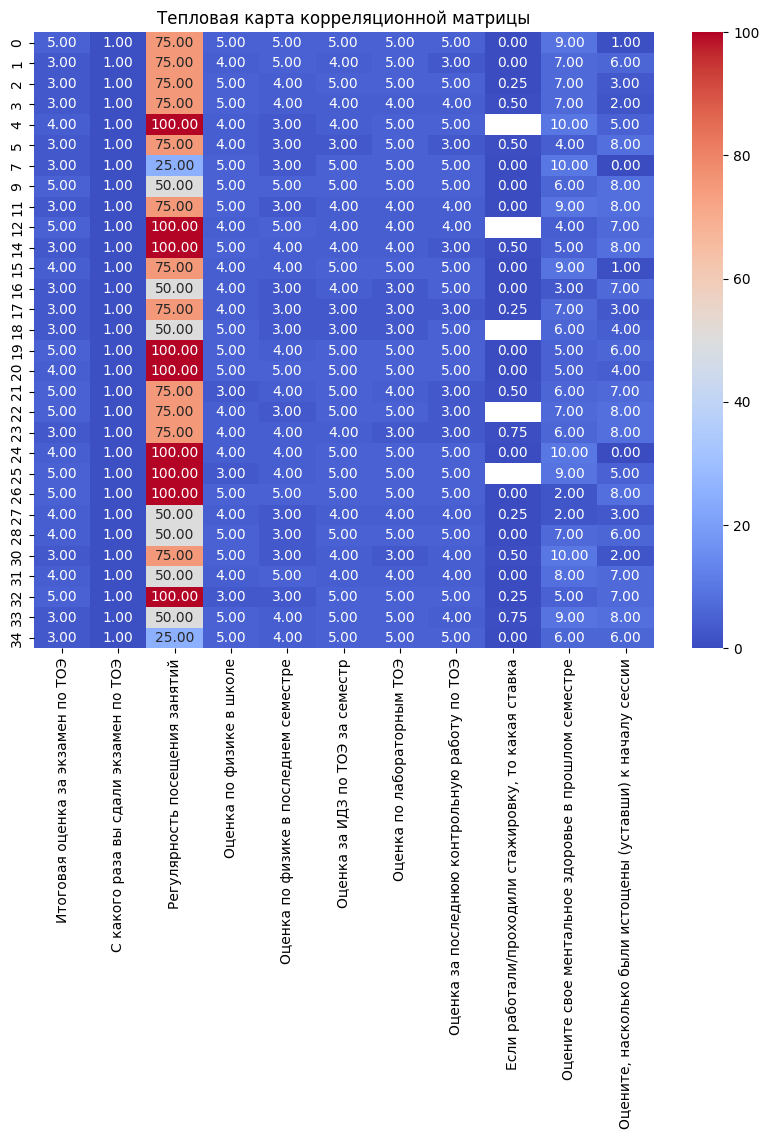

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

# Строим график распределения целевой переменной

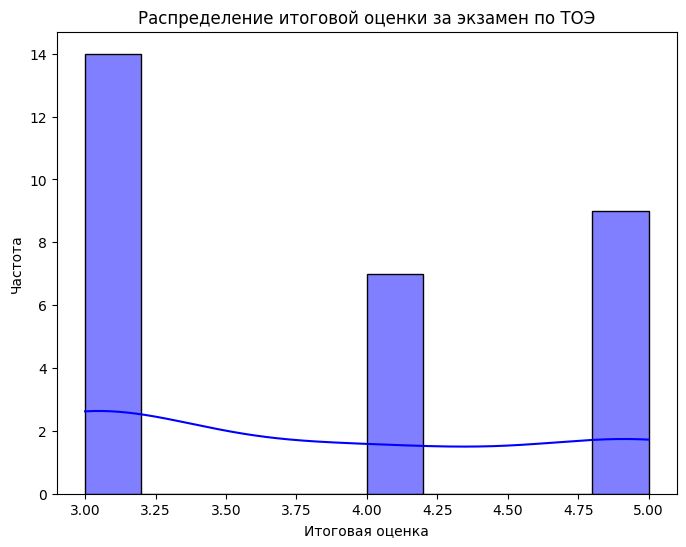

In [109]:
plt.figure(figsize=(8, 6))
sns.histplot(data_numeric['Итоговая оценка за экзамен по ТОЭ'], kde=True, bins=10, color='blue')
plt.title('Распределение итоговой оценки за экзамен по ТОЭ')
plt.xlabel('Итоговая оценка')
plt.ylabel('Частота')
plt.show()

# Вычисляем и отображаем наиболее важные параметры для модели

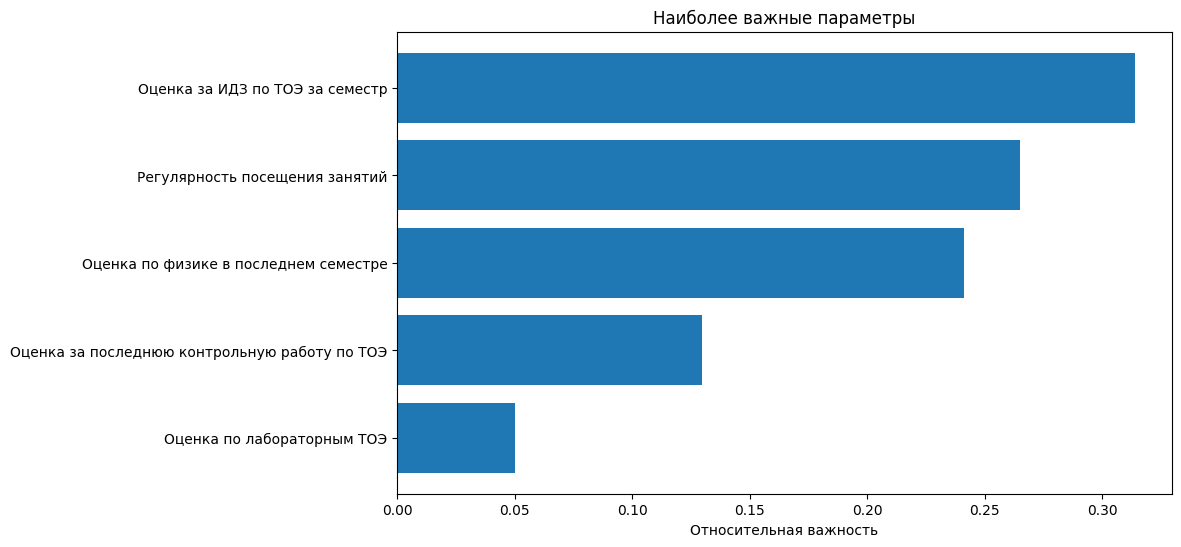

In [110]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Наиболее важные параметры')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
plt.xlabel('Относительная важность')
plt.show()

# Диаграмма рассеяния действительной и прогнозируемых значений

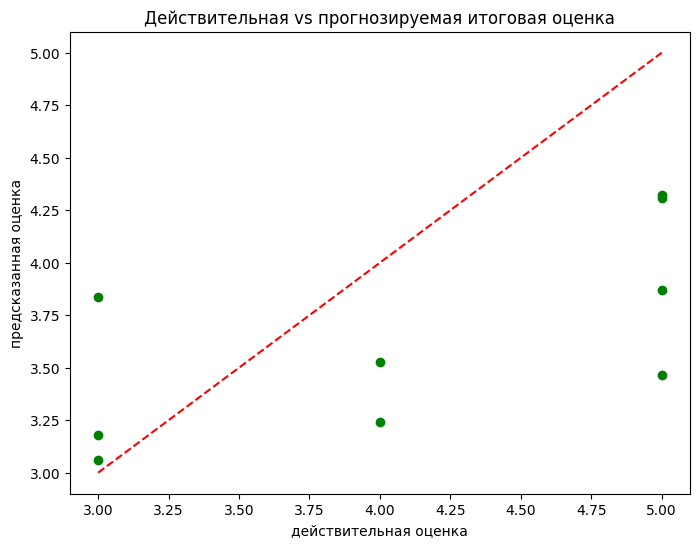

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Действительная vs прогнозируемая итоговая оценка')
plt.xlabel('действительная оценка')
plt.ylabel('предсказанная оценка')
plt.show()

# вычисляем остатки от вычисленных значений

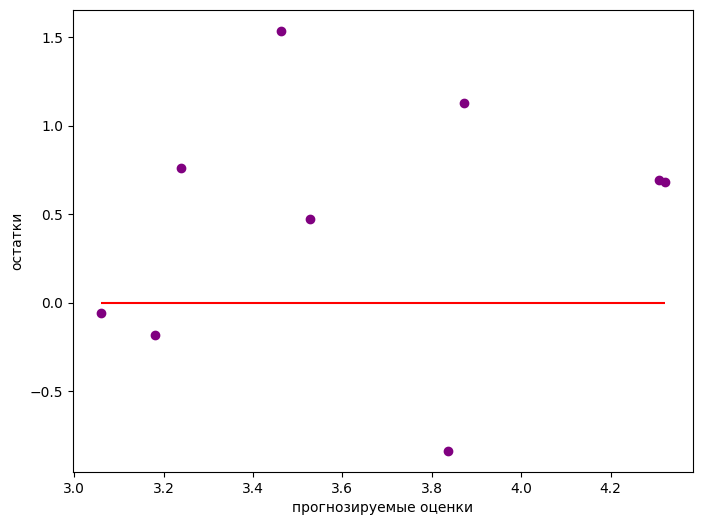

In [112]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('прогнозируемые оценки')
plt.ylabel('остатки')
plt.show()

# Отображаем распределение ошибок

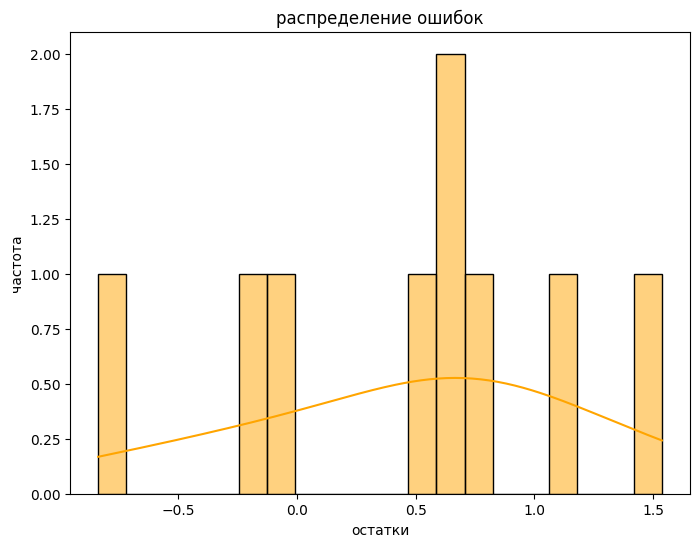

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='orange')
plt.title('распределение ошибок')
plt.xlabel('остатки')
plt.ylabel('частота')
plt.show()